In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Rating=pd.read_csv('Rating_Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,Its an absolute beast if u know what are the n...
1,1,5,This is the best laptop in this range.I reciev...
2,2,5,Good product as used of now.... Everything is ...
3,3,5,AWESOME LAPTOP. It supports many high spec gam...
4,4,4,For that price... it's exceptionally good. Pla...


In [3]:
Rating

,Unnamed: 0,Ratings,Full_review
0,0,5,Its an absolute beast if u know what are the n...
1,1,5,This is the best laptop in this range.I reciev...
2,2,5,Good product as used of now.... Everything is ...
3,3,5,AWESOME LAPTOP. It supports many high spec gam...
4,4,4,For that price... it's exceptionally good. Pla...
...,...,...,...
50985,50985,5,"Good network signal, and very good at this pri..."
50986,50986,3,Tenda N 301 wireless router its not working pr...
50987,50987,1,WAN is not working. Cannot get any internet :'...
50988,50988,5,gud mrng sir...the product was good nd its suc...


In [4]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [5]:
print('shape = >',Rating.shape)

shape = > (50990, 2)


Observation:

In [6]:
print('Rating counts','\n',Rating.Ratings.value_counts())

Rating counts 
 5    27754
4    10078
1     6605
3     4349
2     2204
Name: Ratings, dtype: int64


Observation:

Maximum, 27754 number of ratings present is of 5 star and minimum, 2204 is of 2 star.

In [7]:
def plot_labels(Rating, title=None):
  ds_labels = Rating["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

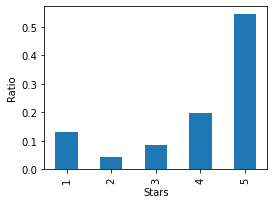

In [8]:
plot_labels(Rating, "stars")

Dataset is imbalanced

In [9]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,Its an absolute beast if u know what are the n...,500
1,5,This is the best laptop in this range.I reciev...,500
2,5,Good product as used of now.... Everything is ...,271
3,5,AWESOME LAPTOP. It supports many high spec gam...,96
4,4,For that price... it's exceptionally good. Pla...,342


In [10]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50990 entries, 0 to 50989
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      50990 non-null  int64 
 1   Full_review  50990 non-null  object
 2   length       50990 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [11]:
Rating.isnull().sum()

Ratings        0
Full_review    0
length         0
dtype: int64

<AxesSubplot:>

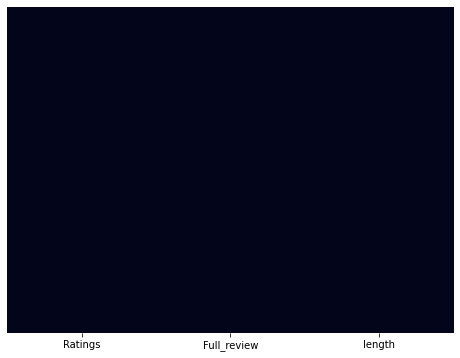

In [12]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Rating.isnull(),yticklabels=False,cbar=False)

Observation

Nothing is missing in the dataset

In [13]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [14]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
#remove punctuation
Rating['Full_review']=Rating['Full_review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Rating['Full_review']=Rating['Full_review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Rating['Full_review']=Rating['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [16]:
Rating.head()

,Ratings,Full_review,length
0,5,its an absolute beast if u know what are the n...,500
1,5,this is the best laptop in this range i reciev...,500
2,5,good product as used of now everything is good...,271
3,5,awesome laptop it supports many high spec game...,96
4,4,for that price it s exceptionally good played ...,342


In [17]:
#Remove stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

Rating['Full_review'] = Rating['Full_review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
Rating['clean_length'] = Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,absolute beast know necessary steps follow com...,500,294
1,5,best laptop range recieved late delivery due b...,500,337
2,5,good product used everything good also ssd slo...,271,150
3,5,awesome laptop supports many high spec games l...,96,84
4,4,price exceptionally good played far cry numbr ...,342,254


In [19]:
print('original Review length', Rating.length.sum())
print('clean Review length', Rating.clean_length.sum())

original Review length 3033273
clean Review length 2154473


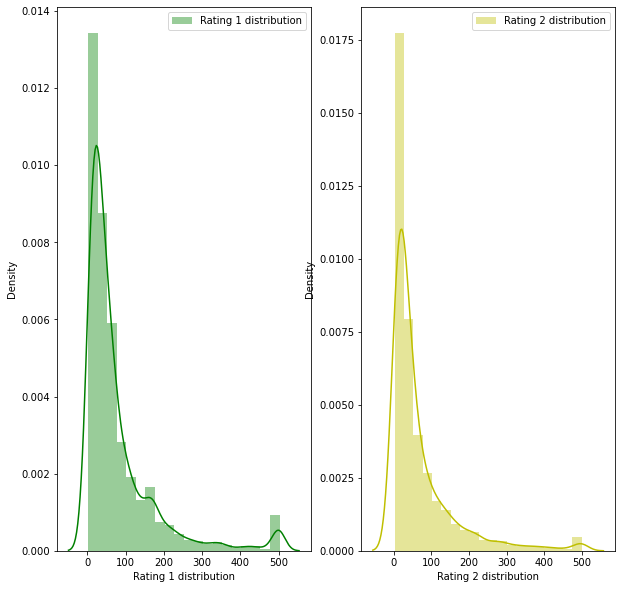

In [20]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='g')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

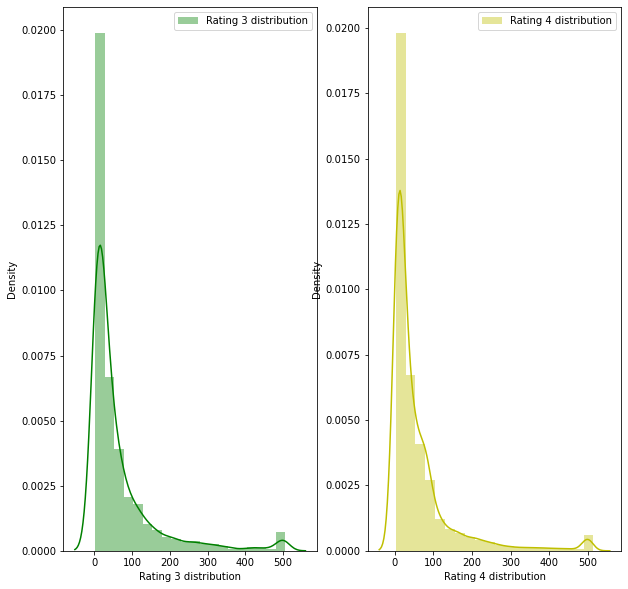

In [21]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='y')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

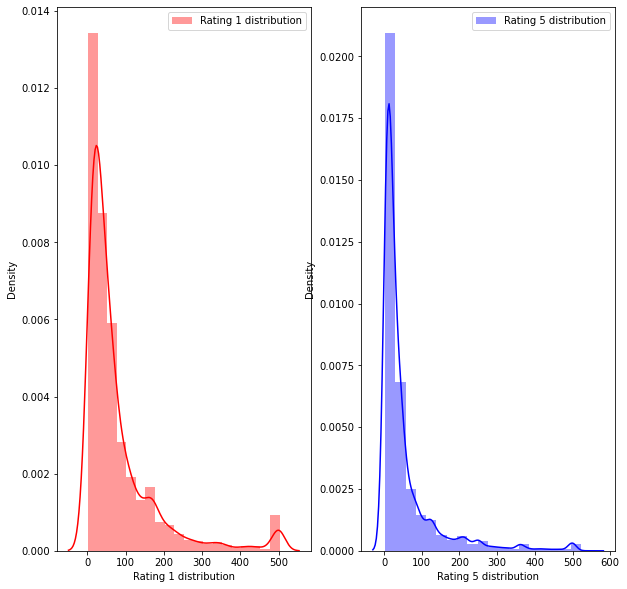

In [22]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

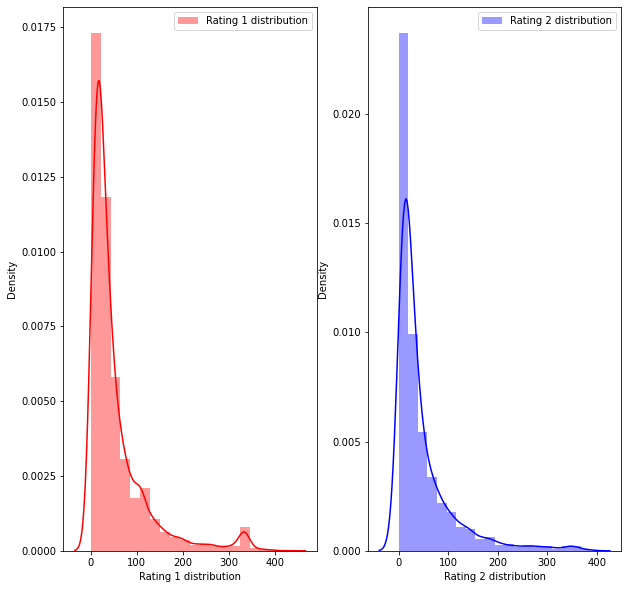

In [23]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='b')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

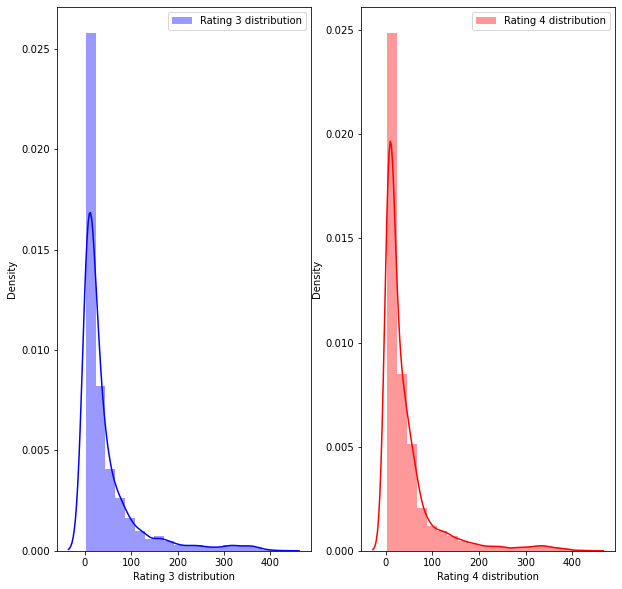

In [24]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='b')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

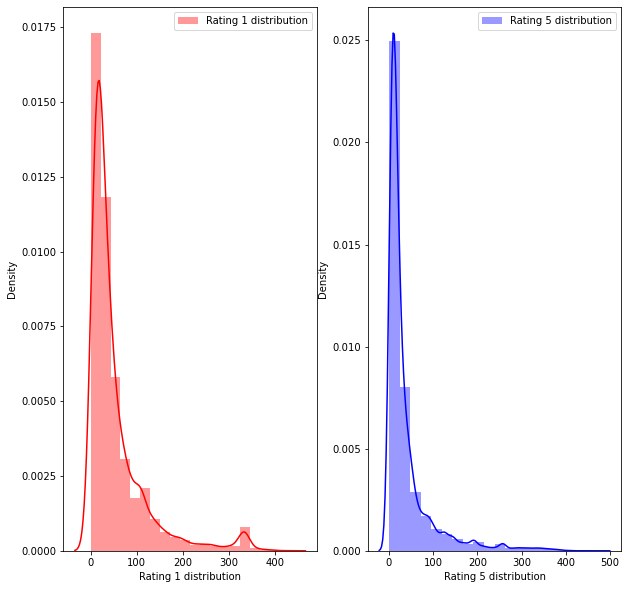

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

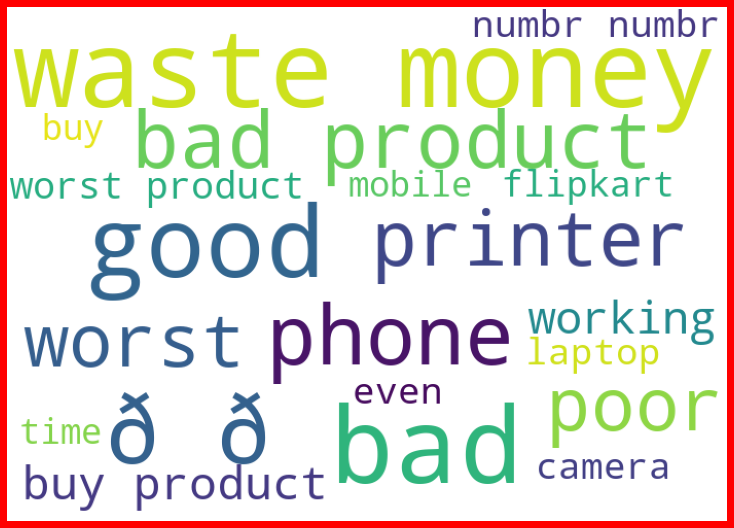

In [26]:
#getting sense of review Loud words in Rating 1
from wordcloud import WordCloud

Rating1=Rating['Full_review'][Rating['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

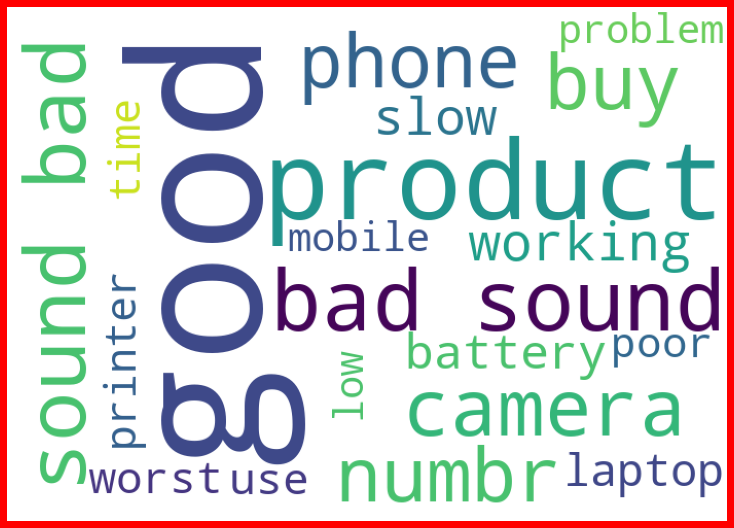

In [27]:
#getting sense of review Loud words in Rating 2

Rating2=Rating['Full_review'][Rating['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

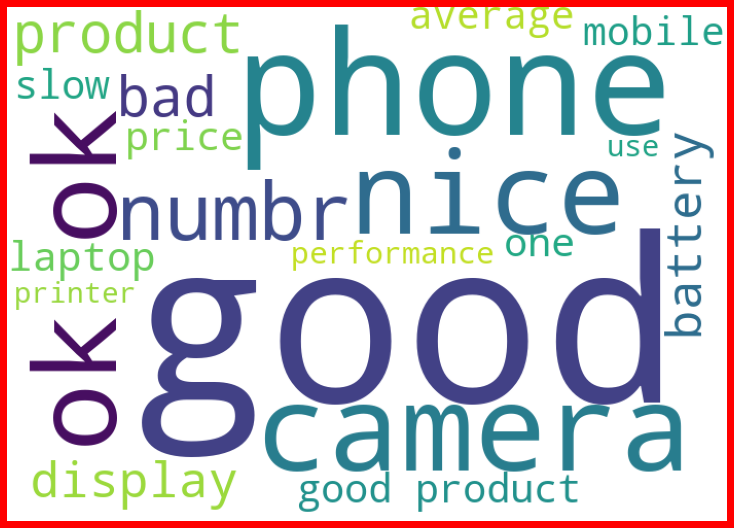

In [28]:
#getting sense of review Loud words in Rating 3

Rating3=Rating['Full_review'][Rating['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

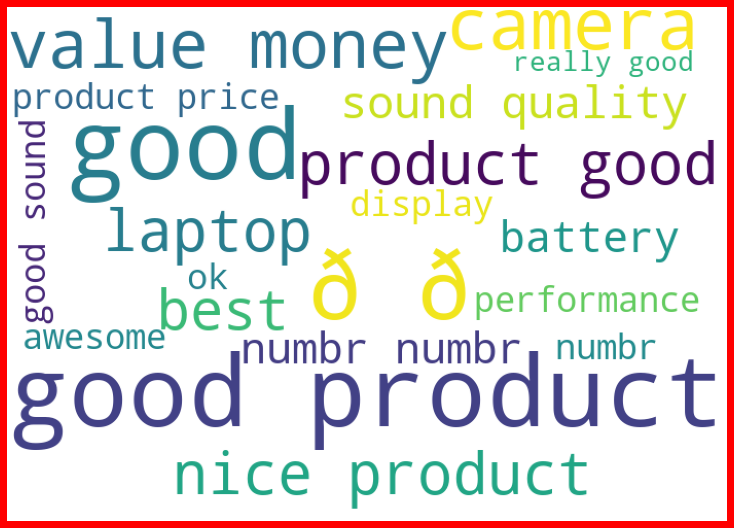

In [29]:
#getting sense of review Loud words in Rating 4

Rating4=Rating['Full_review'][Rating['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

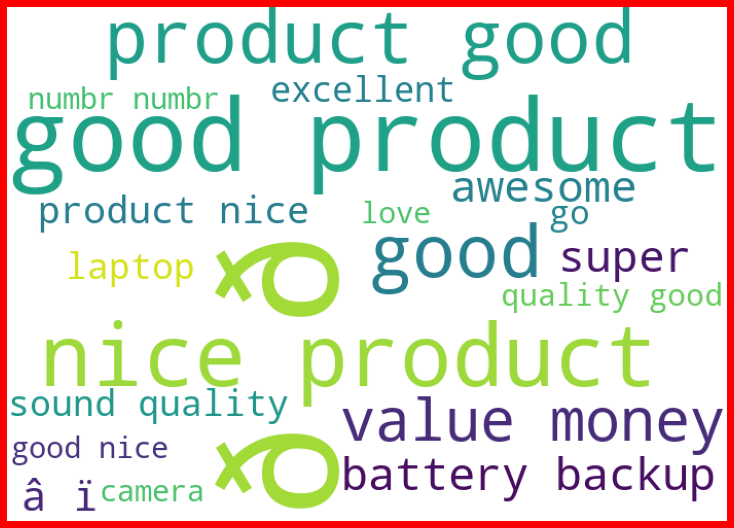

In [30]:
#getting sense of review Loud words in Rating 5

Rating5=Rating['Full_review'][Rating['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

In [32]:
x=feature1

In [33]:
y=Rating['Ratings']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [35]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


# transform the dataset
os=SMOTE(sampling_strategy = {1: 22132, 2: 22132, 3: 22132, 4: 22132, 5: 22132})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 22132, 4: 8096, 1: 5327, 3: 3473, 2: 1764})
The number of classes after fit Counter({5: 22132, 4: 22132, 3: 22132, 1: 22132, 2: 22132})


In [36]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [37]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [38]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.3833104530300059


Cross_Val_Score =  0.5618944891155129


classification_report
               precision    recall  f1-score   support

           1       0.42      0.64      0.51      1278
           2       0.10      0.38      0.15       440
           3       0.15      0.17      0.16       876
           4       0.28      0.46      0.35      1982
           5       0.82      0.33      0.47      5622

    accuracy                           0.38     10198
   macro avg       0.35      0.40      0.33     10198
weighted avg       0.58      0.38      0.41     10198



[[ 820  259   77   92   30]
 [ 171  169   51   41    8]
 [ 194  245  149  226   62]
 [ 228  317  214  920  303]
 [ 544  768  505 1954 1851]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeCl

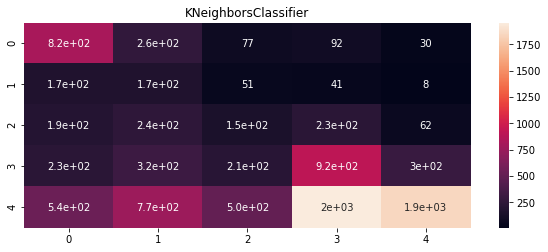

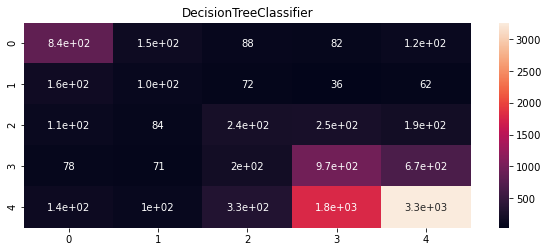

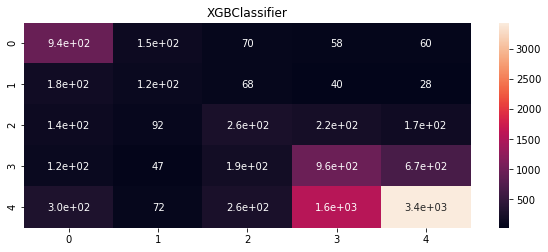

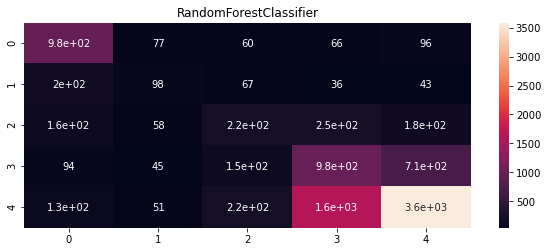

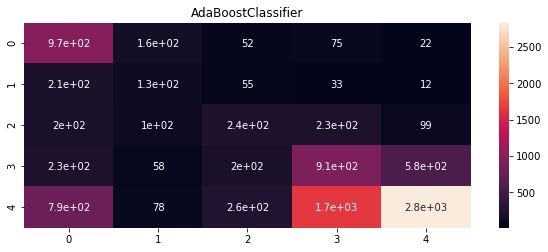

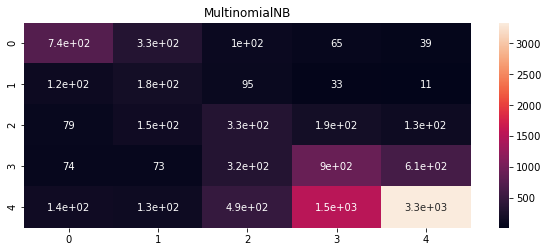

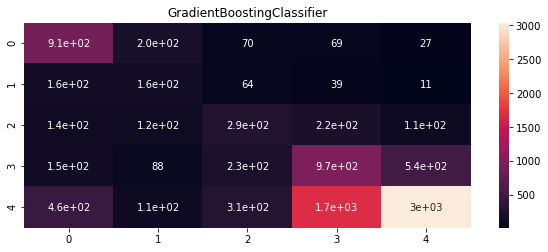

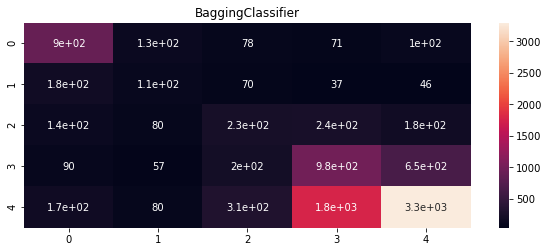

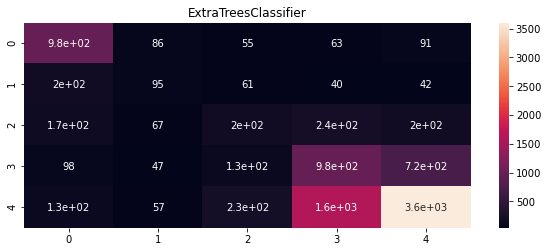

In [39]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [40]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,38.331045,56.189449
1,DecisionTreeClassifier,53.059423,59.801922
2,XGBClassifier,55.952147,64.634242
3,RandomForestClassifier,57.599529,64.777407
4,AdaBoostClassifier,49.803883,61.406158
5,MultinomialNB,53.834085,62.035693
6,GradientBoostingClassifier,52.667190,63.322220
7,BaggingClassifier,54.069425,62.886841
8,ExtraTreesClassifier,57.521083,64.775446


Using gridsearch cv to find the best parameters in random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x_train_ns,y_train_ns)
print(clf.best_params_)

In [ ]:
rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

In [ ]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

Random forest classifier is giving us best results so we save it as our final model.

In [ ]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

In [ ]:
model=joblib.load('Ratings_prediction.csv')

In [ ]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)